In [1]:
import pandas as pd

# Replace 'books.csv' with the actual path to your CSV file
file_path = 'books.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns.')


The dataset has 399 rows and 24 columns.


In [2]:
books_without_original_title = df['original_title'].isnull().sum()

print(f'The number of books without an original title is: {books_without_original_title}')

The number of books without an original title is: 36


In [3]:
df = df.dropna(subset=['original_title'])

# Count the number of unique books based on 'book_id'
unique_books_count = df['book_id'].nunique()

print(f'The number of unique books based on "book_id" after removing null values in the "original_title" column is: {unique_books_count}')

The number of unique books based on "book_id" after removing null values in the "original_title" column is: 363


In [5]:
average_rating = df['average_rating'].mean()

print(f'The average rating of all books in the dataset is: {average_rating:.2f}')

The average rating of all books in the dataset is: 3.99


In [6]:
books_published_2000 = df[df['original_publication_year'] == 2000]

# Get the number of books published in the year 2000
num_books_published_2000 = len(books_published_2000)

print(f'The number of books published in the year 2000 is: {num_books_published_2000}')

The number of books published in the year 2000 is: 7


In [7]:
max_ratings_book = df.loc[df['work_ratings_count'].idxmax()]

# Get the title of the book with the maximum ratings
max_ratings_title = max_ratings_book['title']

print(f'The book with the maximum number of ratings is: {max_ratings_title} ({max_ratings_book["work_ratings_count"]:.0f} ratings)')

The book with the maximum number of ratings is: The Diary of a Young Girl (2024493 ratings)


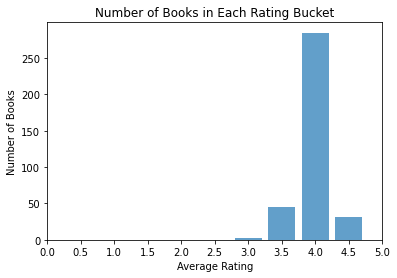

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Round the average_rating to the nearest 0.5
df['rounded_rating'] = df['average_rating'].apply(lambda x: round(x * 2) / 2)

# Count the number of books in each rating bucket
rating_counts = df['rounded_rating'].value_counts().sort_index()

# Plot a bar graph
plt.bar(rating_counts.index, rating_counts.values, width=0.4, align='center', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.show()